# S&P 500 Time Series Analysis in R

In [23]:
install.packages("tseries")
install.packages("forecast")
install.packages("quantmod")
install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
# load libraries
library(quantmod)
library(tseries)
library(forecast)
library(nortest)

## Get the Data from Yahoo Finance

Using the library(quantmod), we get the S&P500 time series data from yahoo finance with the code below:

In [25]:
# pull S&P500 data from yahoo finance
getSymbols("^GSPC", from = '2009-01-01',
           to = "2022-12-31",warnings = FALSE,
           auto.assign = TRUE)

[1] "GSPC"

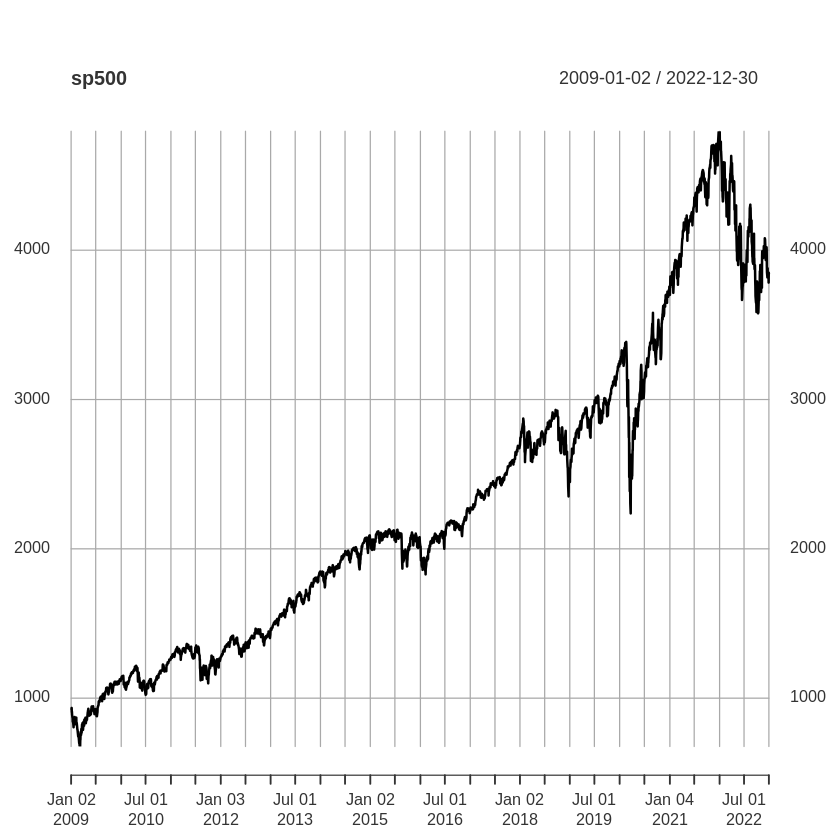

In [26]:
# 1. Get the adjusted_price and date column for the forecast and transform
# the xts object
price <- GSPC$GSPC.Adjusted
dt <- as.Date(index(GSPC))
sp500 <- xts(price, dt)
plot(sp500)

## Log Returns

Transforming our series to log returns gives us the rate of exponential growth, which is useful for smoothening our data for analysis. While our initial time series contains an upward trend, the log return eliminates the non-stationary components of our data.

$ r_t  =  ln⁡(p_t/p_(t-1) )  =  ln⁡〖(p_t )  - ln⁡(p_(t-1) ) 〗$

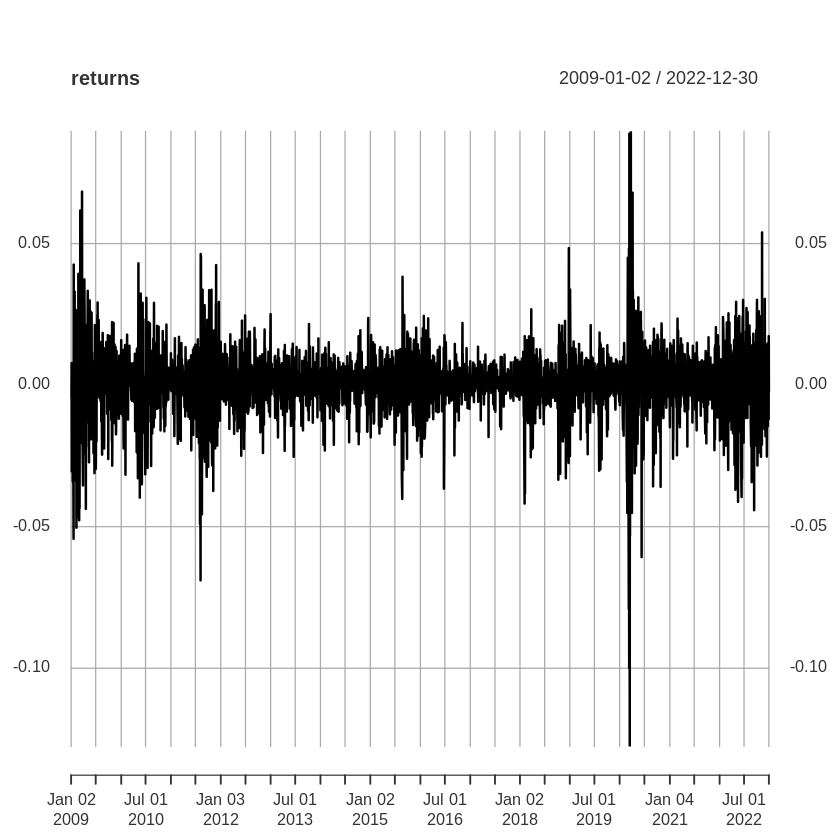

In [27]:
# 2. Transform your series to log returns
returns <- diff(log(sp500))
plot(returns)

##	ACF and PACF functions

The ACF and PACF function are tools for checking the interrelationships between our time series data and deciding what statistical model to use in analyzing our time series. In the ACF and PACF function below, we observe that autocorrelation exists in our data hence, we need an Auto Regressive Integrated Moving Average Model to model our time series. We also see about 4 autocorrelations above our confidence level up to lag 10 respectively. So, we can estimate that we require 4 Moving Averages (MA4) and 4 Auto Regression (AR4) to model this time series.


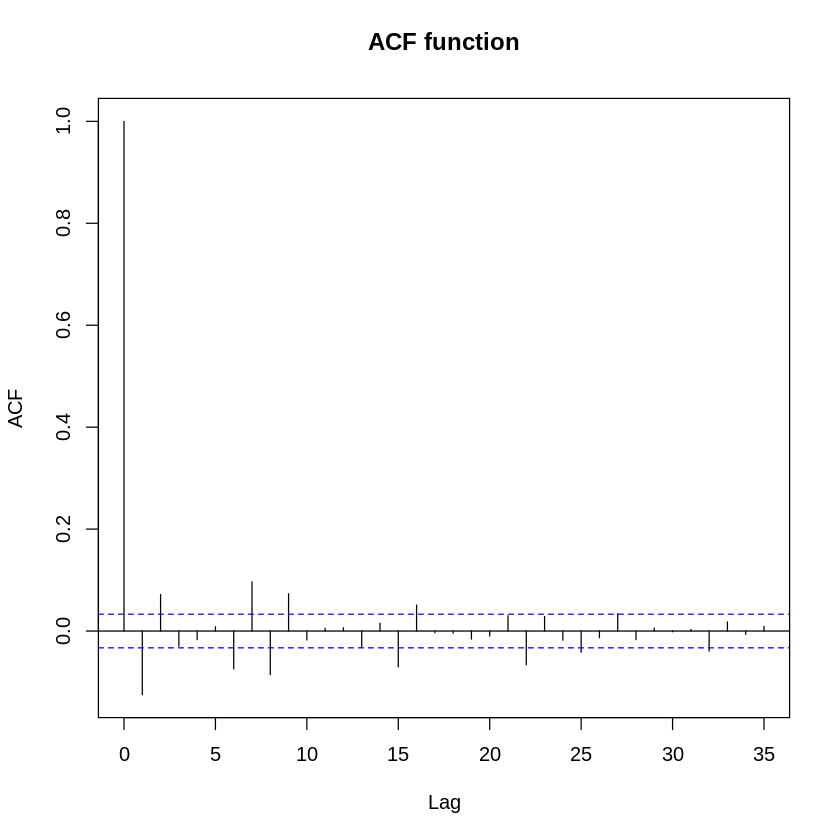

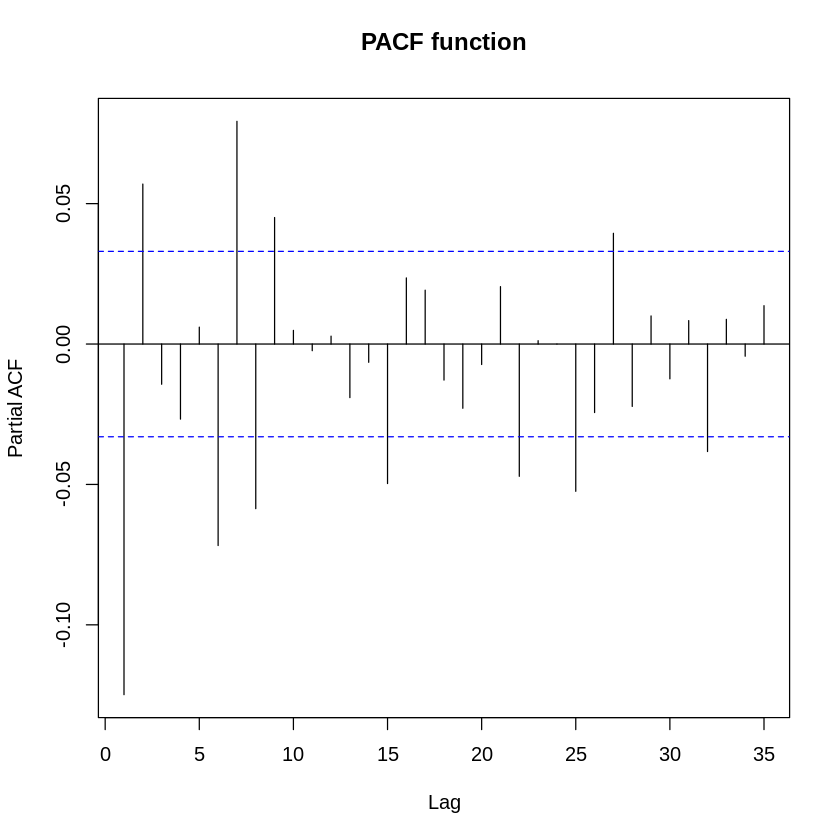

In [30]:
#3. Examine the ACF and PACF functions
par(mfrow=c(1,1))
acf(returns, na.action = na.pass, main="ACF function")
pacf(returns, na.action = na.pass, main="PACF function")


##	Ljung box test.

This is a test that describes the independence and measure of fit for our time series.

 $H_0$: the null hypothesis states that there is zero autocorrelation in our time series.

 $H_A$ : the alternative hypothesis states that we don’t have enough evidence to reject the null hypothesis. i.e., the model exhibits a lack of fit.

For $alpha$=0.05, we reject  $H_0$ if our p-value is less than $alpha$


In [31]:
#4. Perform ljung-box test
Box.test(returns, lag=20, type = 'Ljung-Box')
#p-value <0.05, so we Reject the null hypothesis
# H0: series shows autocorrelation.
#Ha: series shows no correlation


	Box-Ljung test

data:  returns
X-squared = 208.37, df = 20, p-value < 2.2e-16


## Stationarity Test

The KPSS test is a unit root test to check for the stationarity of a time series around a trend.

$H_0$: the null hypothesis states that the series is trend stationary.

$H_A$ : the alternative hypothesis states that the series is non-stationary.

For $alpha$=0.05, we reject  $H_0$ if our p-value is less than $alpha$


In [32]:
#5. Test for stationarity
kpss.test(returns) #na.action=na.pass)

Warning message in kpss.test(returns):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  returns
KPSS Level = 0.041316, Truncation lag parameter = 9, p-value = 0.1


##	Normality Test
This is used to check if our data is well modeled by a normal distribution. Using the Lilliefors and Pearson chi-squared test for normality:

$H_0$: the null hypothesis states that the series follows a normal distribution.

$H_A$: the alternative hypothesis states that the series does not follow a normal distribution.

From our output, the p-value is less than $alpha$, meaning our series is not normally distributed, therefore we reject the null hypothesis $H_0$.

In [36]:
#6. Perform a normality test
ad.test(returns)
lillie.test(coredata(returns))
sf.test(returns)
#shapiro.test(returns)
pearson.test(returns)

Warning message in ad.test(returns):
“Incompatible methods ("Ops.xts", "Ops.zoo") for "+"”



	Anderson-Darling normality test

data:  returns
A = 3499.2, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  coredata(returns)
D = 0.10705, p-value < 2.2e-16



	Shapiro-Francia normality test

data:  returns
W = 4.2048e-05, p-value < 2.2e-16



	Pearson chi-square normality test

data:  returns
P = 716.02, p-value < 2.2e-16


##	Fit the ARIMA model
We run the auto.arima(returns) gives us the best fit for our model as (4,0,4) where
AR = p = 4 is the lag order. MA = q = 4 is the moving average and I = d = 0 is the integrated which we differenced in question ii.





 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -21413.91
 ARIMA(0,0,0) with non-zero mean : -21301.06
 ARIMA(1,0,0) with non-zero mean : -21353.62
 ARIMA(0,0,1) with non-zero mean : -21348.34
 ARIMA(0,0,0) with zero mean     : -21298.96
 ARIMA(1,0,2) with non-zero mean : -21361.87
 ARIMA(2,0,1) with non-zero mean : -21361.2
 ARIMA(3,0,2) with non-zero mean : -21373.9
 ARIMA(2,0,3) with non-zero mean : Inf
 ARIMA(1,0,1) with non-zero mean : -21362
 ARIMA(1,0,3) with non-zero mean : Inf
 ARIMA(3,0,1) with non-zero mean : -21374.37
 ARIMA(3,0,3) with non-zero mean : -21404.85
 ARIMA(2,0,2) with zero mean     : -21410.33

 Now re-fitting the best model(s) without approximations...

 ARIMA(2,0,2) with non-zero mean : -21416.19

 Best model: ARIMA(2,0,2) with non-zero mean 



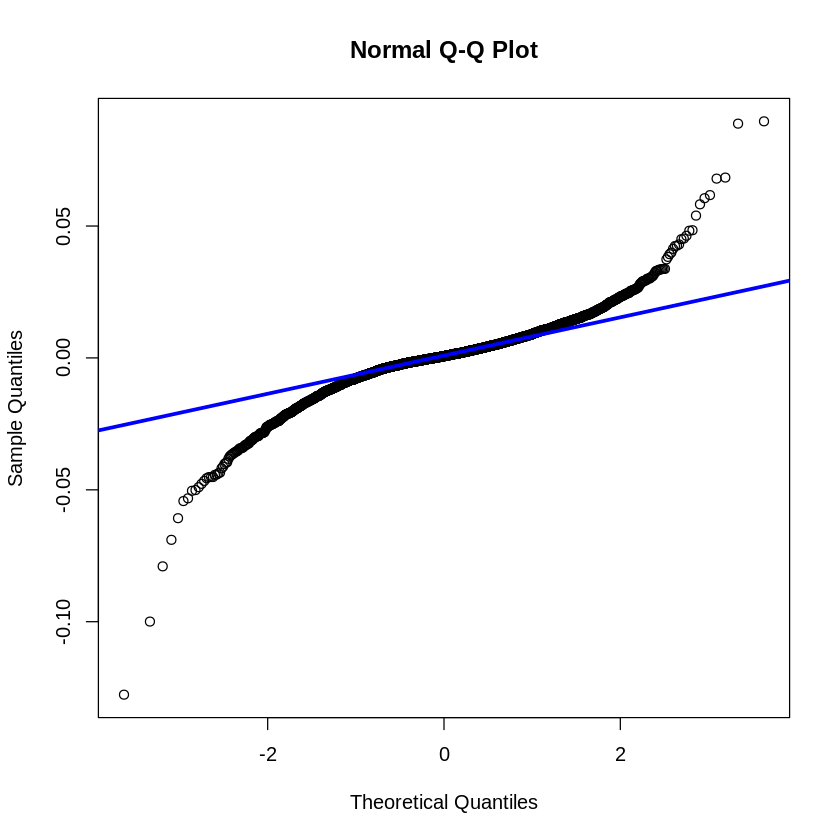

In [42]:
fit1 <- auto.arima(returns, ic='aic', trace=TRUE) #best fit for the arima mode is 2,0,2
fit2 <- arima(returns, order=c(2,0,2), include.mean=FALSE)#, include.mean = TRUE) #fit model in the data
qqnorm(returns)
qqline(returns, col='blue', lwd=3)

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”



 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -21413.91
 ARIMA(0,0,0) with non-zero mean : -21301.06
 ARIMA(1,0,0) with non-zero mean : -21353.62
 ARIMA(0,0,1) with non-zero mean : -21348.34
 ARIMA(0,0,0) with zero mean     : -21298.96
 ARIMA(1,0,2) with non-zero mean : -21361.87
 ARIMA(2,0,1) with non-zero mean : -21361.2
 ARIMA(3,0,2) with non-zero mean : -21373.9
 ARIMA(2,0,3) with non-zero mean : Inf
 ARIMA(1,0,1) with non-zero mean : -21362
 ARIMA(1,0,3) with non-zero mean : Inf
 ARIMA(3,0,1) with non-zero mean : -21374.37
 ARIMA(3,0,3) with non-zero mean : -21404.85
 ARIMA(2,0,2) with zero mean     : -21410.33

 Now re-fitting the best model(s) without approximations...

 ARIMA(2,0,2) with non-zero mean : -21416.19

 Best model: ARIMA(2,0,2) with non-zero mean 



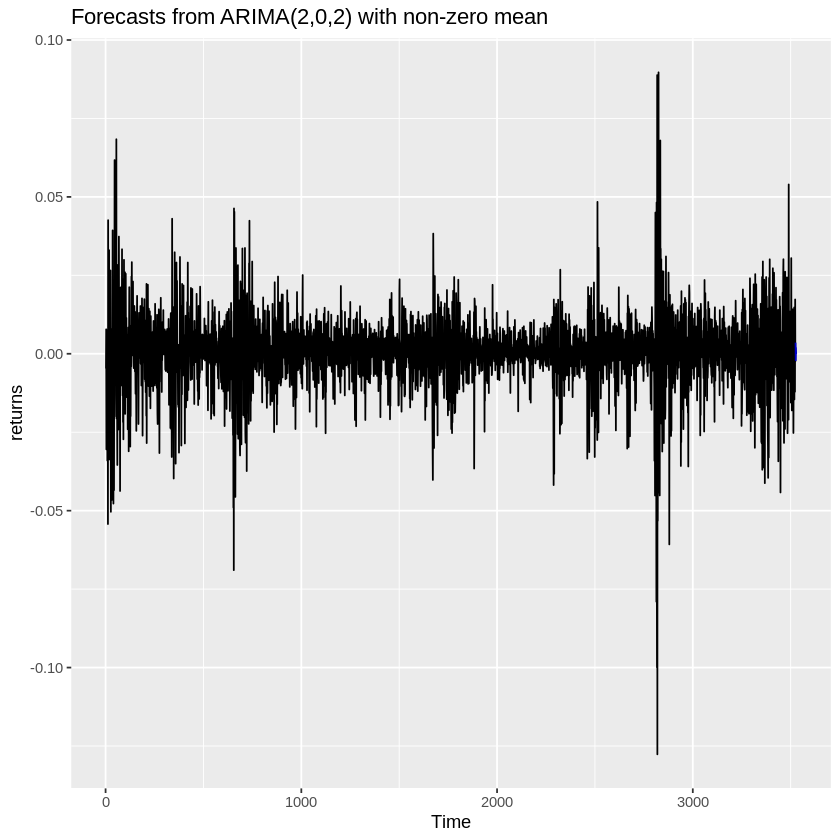

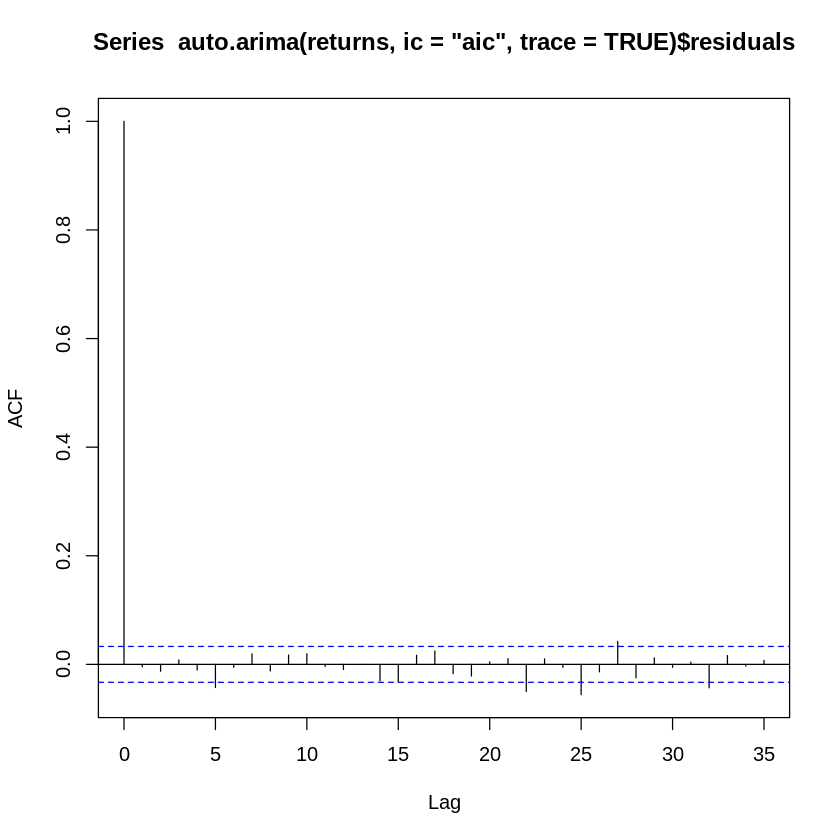

In [43]:
#make a forecast: not included
f_cast <- forecast(fit1, h=5, level = c(99))
autoplot((f_cast))

acf(auto.arima(returns, ic='aic', trace=TRUE)$residuals)


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2) with non-zero mean
Q* = 12.002, df = 6, p-value = 0.06193

Model df: 4.   Total lags used: 10



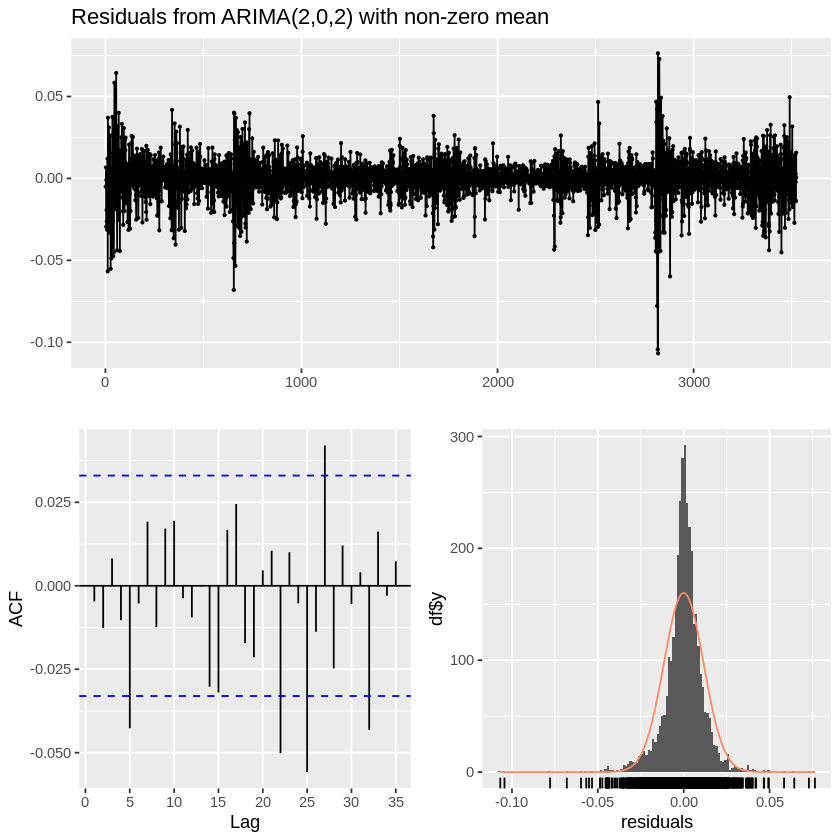

In [44]:
#9.
checkresiduals(fit1)

## Summary
From the output above, we observe that our model is around a mean $E[e_t ]=0$.
We have a finite variance $VarE[e_t ]$ = 2 =  0.0001306
The residual follows a normal distribution with zero auto covariance.
In the ACF plot, up to lag 15 except at lag 5 there’s no dependence, meaning we have no autocorrelation. The histogram in the residuals chart is bell shaped meaning our model follows a normal distribution suggesting it is symmetrical.

In summary, the ARIMA(2,0,2) models our data well and will be a good fit in forecasting our time series.
